In [ ]:
#connect google colab with google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:

#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/train.zip')


#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/test.zip')

#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/validation.zip')

#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [ ]:
import os
import glob

folder_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'  # replace with the actual folder path

yes_path = os.path.join(folder_path, 'yes')
no_path = os.path.join(folder_path, 'no')

yes_count = len(glob.glob(os.path.join(yes_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images
no_count = len(glob.glob(os.path.join(no_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images

print(f'Total images in "yes" folder: {yes_count}')
print(f'Total images in "no" folder: {no_count}')
print(yes_count+no_count)


Total images in "yes" folder: 7180
Total images in "no" folder: 7220
14400


In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the image size and batch size
img_size = (256, 256)
batch_size = 32

In [ ]:
# Define data paths
train_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'
test_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/test'
val_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/validation'

In [ ]:
# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 14400 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
# Load the pretrained ResNet101 model without the top (fully connected) layers
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

171446536/171446536 [==============================] - 5s 0us/step


In [ ]:
# Create a new model and add the base model and new fully connected layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: 'yes' and 'no'

In [ ]:
# Freeze the base model layers
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
num_epochs = 30
steps_per_epoch = train_generator.samples // batch_size
val_steps = val_generator.samples // batch_size

In [ ]:
history = model.fit(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_steps
)

Epoch 1/30
450/450 [==============================] - 142s 281ms/step - loss: 1.0447 - accuracy: 0.7785 - val_loss: 0.4758 - val_accuracy: 0.7757
Epoch 2/30
450/450 [==============================] - 123s 273ms/step - loss: 0.3025 - accuracy: 0.8687 - val_loss: 0.2354 - val_accuracy: 0.9068
Epoch 3/30
450/450 [==============================] - 124s 276ms/step - loss: 0.3064 - accuracy: 0.8705 - val_loss: 0.2169 - val_accuracy: 0.9146
Epoch 4/30
450/450 [==============================] - 128s 284ms/step - loss: 0.2038 - accuracy: 0.9173 - val_loss: 0.2435 - val_accuracy: 0.8962
Epoch 5/30
450/450 [==============================] - 121s 268ms/step - loss: 0.1913 - accuracy: 0.9206 - val_loss: 0.3640 - val_accuracy: 0.8365
Epoch 6/30
450/450 [==============================] - 127s 282ms/step - loss: 0.1570 - accuracy: 0.9360 - val_loss: 0.1707 - val_accuracy: 0.9353
Epoch 7/30
450/450 [==============================] - 128s 284ms/step - loss: 0.1680 - accuracy: 0.9324 - val_loss: 0.2380 -

In [ ]:
# Evaluate the model on the test set
test_steps = test_generator.samples // batch_size
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


56/56 [==============================] - 15s 256ms/step - loss: 0.1374 - accuracy: 0.9593
Test Loss: 0.13737984001636505
Test Accuracy: 0.9592633843421936


In [ ]:
# Save the model
model.save('/content/gdrive/MyDrive/MajorProject/resnet101.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model

resnet101_model = load_model('/content/gdrive/MyDrive/MajorProject/resnet101.h5')

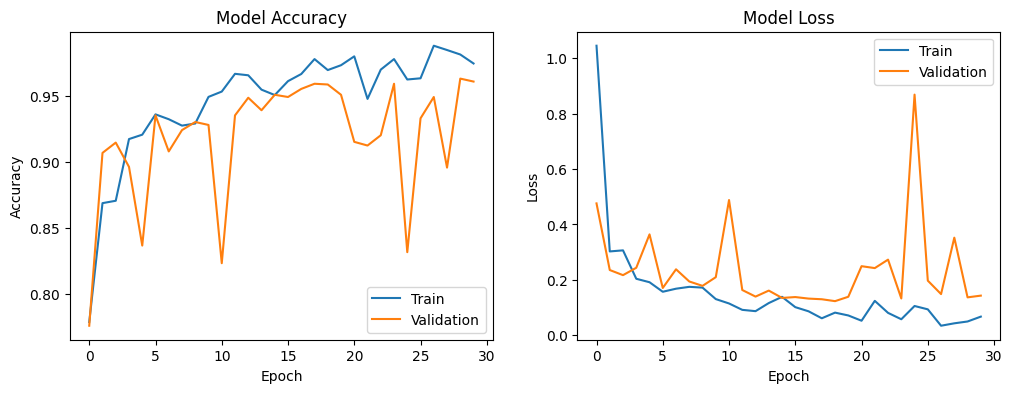

In [ ]:
import matplotlib.pyplot as plt

# Plot training vs test accuracy and loss, and training vs validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict the classes for the test set
test_steps = test_generator.samples // batch_size
predictions = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Extract true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)

beta = 0.5  # F-beta score with beta = 0.5
fbeta_score = ((1 + beta**2) * precision * recall) / ((beta**2 * precision) + recall)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("F-beta Score (beta = 0.5):", fbeta_score)


56/56 [==============================] - 17s 244ms/step


ValueError: ignored